In [ ]:
import pandas as pd

# load CSV data
data_path = '/content'
recipes = pd.read_csv(data_path+'/PP_recipes.csv',
                          names=["recipe_id", "i", "name_tokens", "ingredient_tokens", "steps_tokens", "techniques", "calorie_level", "ingredient_ids"]
                      )

# remove unneeded columns (and first row, which held the column labels) and preview the dataset
recipes = recipes.drop(["i", "name_tokens", "ingredient_tokens", "steps_tokens", "techniques"], axis=1)
recipes = recipes.iloc[1:]
recipes.head()

<ipython-input-135-6daca96dfbbf>:5: DtypeWarning: Columns (0,1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  recipes = pd.read_csv(data_path+'/PP_recipes.csv',


,recipe_id,calorie_level,ingredient_ids
1,424415,0,"[389, 7655, 6270, 1527, 3406]"
2,146223,0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
3,312329,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
4,74301,0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
5,76272,0,"[3484, 6324, 7594, 243]"


In [ ]:
ratings = pd.read_csv(data_path+'/RAW_interactions.csv',
                          names=["user_id", "recipe_id", "date", "rating", "review"]
                      )

# remove unneeded columns (and first row, which held the column labels) and preview the dataset
ratings = ratings.drop(["user_id", "date", "review"], axis=1)
ratings = ratings.iloc[1:]
ratings.head()

<ipython-input-136-989f6b7ec57e>:1: DtypeWarning: Columns (0,1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  ratings = pd.read_csv(data_path+'/RAW_interactions.csv',


,recipe_id,rating
1,40893,4
2,40893,5
3,44394,4
4,85009,5
5,85009,5


In [ ]:
# get info about recipe time, number of steps, and nutrition
misc = pd.read_csv(data_path+'/RAW_recipes.csv',
                          names=["name", "recipe_id", "minutes", "contributor_id", "submitted", "tags", "nutrition", "n_steps", "steps", "description", "ingredients", "n_ingredients"]
                  )

# remove unneeded columns (and first row, which held the column labels) and preview the dataset
misc = misc.drop(["name", "contributor_id", "submitted", "tags", "steps", "description"], axis=1)
misc = misc.iloc[1:]
misc.head()
result = []
# convert nutrition data to floats
for lst in misc["nutrition"]:
  lst = lst[1:len(lst)-1]
  lst = lst.split(",")
  result.append([float(lst[0]), float(lst[1]), float(lst[2]), float(lst[3]), float(lst[4]), float(lst[5])])
misc["nutrition"] = result
print(misc["nutrition"])

<ipython-input-137-198dd1b5acca>:2: DtypeWarning: Columns (1,2,3,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  misc = pd.read_csv(data_path+'/RAW_recipes.csv',


1              [51.5, 0.0, 13.0, 0.0, 2.0, 0.0]
2          [173.4, 18.0, 0.0, 17.0, 22.0, 35.0]
3         [269.8, 22.0, 32.0, 48.0, 39.0, 27.0]
4           [368.1, 17.0, 10.0, 2.0, 14.0, 8.0]
5           [352.9, 1.0, 337.0, 23.0, 3.0, 0.0]
                          ...                  
231633    [415.2, 26.0, 34.0, 26.0, 44.0, 21.0]
231634         [14.8, 0.0, 2.0, 58.0, 1.0, 0.0]
231635          [59.2, 6.0, 2.0, 3.0, 6.0, 5.0]
231636     [188.0, 11.0, 57.0, 11.0, 7.0, 21.0]
231637      [174.9, 14.0, 33.0, 4.0, 4.0, 11.0]
Name: nutrition, Length: 231637, dtype: object


In [ ]:
# merge dataframes so that recipe data is all together
recipes = recipes.merge(misc[["recipe_id", "minutes", "nutrition", "n_steps", "ingredients", "n_ingredients"]], on = "recipe_id")

In [ ]:
# separate the nutrition variable into its components
try:
  recipes.loc[:, "num_calories"] = recipes["nutrition"].map(lambda x: x[0])
  recipes.loc[:, "pdv_total_fat"] = recipes["nutrition"].map(lambda x: x[1])
  recipes.loc[:, "pdv_sugar"] = recipes["nutrition"].map(lambda x: x[2])
  recipes.loc[:, "pdv_sodium"] = recipes["nutrition"].map(lambda x: x[3])
  recipes.loc[:, "pdv_protein"] = recipes["nutrition"].map(lambda x: x[4])
  recipes.loc[:, "pdv_sat_fat"] = recipes["nutrition"].map(lambda x: x[5])
except IndexError:
  print("error!")
recipes = recipes.drop(["nutrition"], axis=1)
recipes.head()

,recipe_id,calorie_level,ingredient_ids,minutes,n_steps,ingredients,n_ingredients,num_calories,pdv_total_fat,pdv_sugar,pdv_sodium,pdv_protein,pdv_sat_fat
0,424415,0,"[389, 7655, 6270, 1527, 3406]",61,6,"['basmati rice', 'water', 'salt', 'cinnamon st...",5,228.2,2.0,2.0,8.0,9.0,1.0
1,312329,1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696...",25,6,"['chicken broth', 'water', 'salt', 'black pepp...",15,351.3,34.0,15.0,50.0,25.0,70.0
2,186383,0,"[2683, 4969, 332, 335, 6270, 800, 4987, 7470, ...",40,8,"['flour', 'oats', 'baking powder', 'baking sod...",10,198.7,13.0,62.0,2.0,5.0,11.0
3,303460,0,"[6413, 7997, 3148, 3710, 1799, 2007, 3203, 265...",30,7,"['sesame oil', 'yoghurt', 'fruit vinegar', 'ho...",9,142.3,16.0,19.0,27.0,4.0,9.0
4,102015,2,"[7783, 1917, 1914, 1920, 6443, 4449, 1252, 840...",165,8,"['white rice', 'cream of chicken soup', 'cream...",11,643.3,53.0,7.0,40.0,72.0,65.0


In [ ]:
ratings_map = {}
# find unique recipe ids
unique_recipe_ids = set()
for r in ratings["recipe_id"][1:]:
  unique_recipe_ids.add(int(r))

# store average rating of each recipe id
average_ratings_map = {}
ratings["recipe_id"][1:] = pd.to_numeric(ratings["recipe_id"][1:])
ratings["rating"][1:] = pd.to_numeric(ratings["rating"][1:])
unique_recipe_ids = list(unique_recipe_ids)
# used to skip over first value since first row has the column headers
unique_recipe_ids.insert(0, -999)
i = 0
for r in unique_recipe_ids:
  if i == 0:
    i += 1
    continue
  average_ratings_map[r] = ratings.loc[ratings["recipe_id"] == r, "rating"].mean()

print(average_ratings_map)
# add average ratings to recipes as a new column
avg_ratings = []
for r_id in recipes["recipe_id"]:
  if r_id in average_ratings_map:
    avg_ratings.append(average_ratings_map[r_id])
  else:
    avg_ratings.append(-999)

recipes["avg_rating"] = avg_ratings
recipes.to_excel("temp-output.xlsx")

In [ ]:
# load most complete data set so far and drop rows with missing avg_rating
# note that above I set avg_rating to -999 if it is missing
import pandas as pd
data = pd.read_excel("temp-output.xlsx")

In [ ]:
data = data.drop(data[data["avg_rating"] < -1].index)
data = data.drop("Unnamed: 0", axis=1) # extra column that got added somehow can be dropped (it stored the row numbers, so not needed)
len(data)

80698

In [ ]:
data.head()

,recipe_id,calorie_level,ingredient_ids,minutes,n_steps,ingredients,n_ingredients,num_calories,pdv_total_fat,pdv_sugar,pdv_sodium,pdv_protein,pdv_sat_fat,avg_rating
18623,481046,1,"[3402, 5921, 1093, 7979, 4623, 7977, 155, 6906...",20,8,"['green cabbage', 'red cabbage', 'carrots', 'y...",11,297.2,11,179,13,8,5,5.0
18624,398227,2,"[3517, 4189, 5010, 3203, 1297, 6270, 2378, 354...",80,10,"['ground lean pork', 'lean ground beef', 'onio...",12,3539.7,372,28,248,300,381,4.0
18625,219652,2,"[5006, 7979, 3399, 2516, 8021, 3203, 6352, 590...",60,11,"['olive oil', 'yellow onion', 'green bell pepp...",14,510.9,18,39,30,31,9,4.0
18626,220393,2,"[3484, 5010, 7946, 4053, 6294]",80,5,"['ground beef', 'onion', 'worcestershire sauce...",5,594.1,46,97,64,75,55,4.0
18627,160872,2,"[389, 5502, 2777, 2832, 3203, 1112, 5010, 5006...",60,14,"['basmati rice', 'plain low-fat yogurt', 'fres...",10,947.6,103,33,6,67,136,5.0


In [ ]:
# LIMITATIONS: QUALITY OF INGREDIENTS, 
# QUANTITY OF INGREDIENTS NEEDED / YIELD OF RECIPE,
# SLIGHTLY DIFFERENT NAMED INGREDIENTS CAN HAVE VERY DIFFERENT PRICES, 
# ETC.

In [ ]:
import pandas as pd
# get latest food data (December 2019) and clean up a bit
# using a data set from Turkey as it is the most comprehensive one available
# also note that prices are measured per kilogram for nearly all goods
food_prices = pd.read_csv("food-turkey.csv", encoding='latin-1')
food_prices = food_prices[(food_prices["Year"] == 2019) & (food_prices["Month"] == 12) & (food_prices["Place"] == "National Average")]
food_prices = food_prices[["ProductName", "Price"]]
food_prices["ProductName"] = [i[:-8].strip() + "(" for i in food_prices["ProductName"]]
# multiply by 0.052 to convert from Turkish lira to USD, then multiply by 1.2 since food prices up ~20% since December 2019 in US (source: bls.gov)
food_prices["Price"] = [i * 0.052 * 1.2 for i in food_prices["Price"]]
food_prices["ProductName"] = [i[0:i.index("(")].lower().strip() for i in food_prices["ProductName"]]
# add / adjust some common recipe ingredients which were missing
food_prices.loc[food_prices["ProductName"] == "milk"] = ["milk", 1.0]
food_prices.loc[food_prices["ProductName"] == "eggs"] = ["eggs", 0.5] # per egg
food_prices.loc[food_prices["ProductName"] == "oil"] = ["olive oil", 7.15]
food_prices.loc[len(food_prices.index)] = ["beef", 4.5]
food_prices.loc[len(food_prices.index)] = ["avocados", 5.5]
food_prices.loc[len(food_prices.index)] = ["butter", 3.5]
food_prices.loc[len(food_prices.index)] = ["flour", 0.25]
food_prices.loc[len(food_prices.index)] = ["chicken", 4.0]
food_prices.loc[len(food_prices.index)] = ["pork", 2.5]
food_prices.loc[len(food_prices.index)] = ["egg", 0.5]
food_prices.loc[len(food_prices.index)] = ["vegetable oil", 3.25]
food_prices.loc[len(food_prices.index)] = ["water", 0]
food_prices.loc[len(food_prices.index)] = ["peppers", 4.75]
food_prices.loc[len(food_prices.index)] = ["broccoli", 6]
food_prices.loc[len(food_prices.index)] = ["kale", 8]
food_prices.loc[len(food_prices.index)] = ["carrots", 5.25]
food_prices.loc[len(food_prices.index)] = ["celery", 4.25]
food_prices.loc[len(food_prices.index)] = ["strawberries", 3.25]
food_prices.loc[len(food_prices.index)] = ["blueberries", 3.25]
food_prices = food_prices.drop(food_prices[food_prices.ProductName == "fuel"].index)
food_prices = food_prices.drop(food_prices[food_prices.ProductName == "transport"].index)
food_prices = food_prices.drop(food_prices[food_prices.ProductName == "meat"].index)
food_prices = food_prices.drop(food_prices[food_prices.ProductName == "bulgur"].index)
len(food_prices) # 55 very common ingredients

55

In [ ]:
data = data.sample(frac=1)
sampled_data = data[0:10000] # run analysis on 10000 random recipes
sampled_data.head(3)

,recipe_id,calorie_level,ingredient_ids,minutes,n_steps,ingredients,n_ingredients,num_calories,pdv_total_fat,pdv_sugar,pdv_sodium,pdv_protein,pdv_sat_fat,avg_rating
37719,324274,2,"[7367, 2518, 1168, 112, 1910, 3589, 2499, 6654...",55,12,"['unsalted butter', 'elbow macaroni', 'cheddar...",11,513.4,56,3,29,43,110,4.40
72163,231360,1,"[2873, 840, 2883, 4964, 3646, 5006]",35,6,"['fresh pumpkin ravioli', 'butter', 'fresh sag...",6,438.2,73,3,11,5,105,5.00
51123,195649,0,"[6324, 1168, 4814, 2200, 5399, 5915, 3957, 7940]",30,10,"['hot pork sausage', 'cheddar cheese', 'monter...",8,114.6,11,0,8,9,15,4.25


In [ ]:
# find total cost of recipes
total_prices = []
for i in sampled_data["ingredients"]:
  recipe_cost = 0
  i_list = i[1:-1].replace("'", "").split(", ")
  for index, row in food_prices.iterrows():
    for ing in i_list:
      if row["ProductName"] in ing:
        recipe_cost += row["Price"]
  total_prices.append(recipe_cost)
print(total_prices)
print(len(total_prices))

In [ ]:
sampled_data["total_cost"] = total_prices
sampled_data.head()

<ipython-input-129-a650f9b258d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_data["total_cost"] = total_prices


,recipe_id,calorie_level,ingredient_ids,minutes,n_steps,ingredients,n_ingredients,num_calories,pdv_total_fat,pdv_sugar,pdv_sodium,pdv_protein,pdv_sat_fat,avg_rating,total_cost
37719,324274,2,"[7367, 2518, 1168, 112, 1910, 3589, 2499, 6654...",55,12,"['unsalted butter', 'elbow macaroni', 'cheddar...",11,513.4,56,3,29,43,110,4.40,10.302988
72163,231360,1,"[2873, 840, 2883, 4964, 3646, 5006]",35,6,"['fresh pumpkin ravioli', 'butter', 'fresh sag...",6,438.2,73,3,11,5,105,5.00,17.800000
51123,195649,0,"[6324, 1168, 4814, 2200, 5399, 5915, 3957, 7940]",30,10,"['hot pork sausage', 'cheddar cheese', 'monter...",8,114.6,11,0,8,9,15,4.25,6.173937
88758,314708,1,"[8021, 1817, 1168, 4717, 2499, 1119, 5006, 486...",15,14,"['zucchini', 'corn muffin mix', 'cheddar chees...",9,337.8,18,56,51,22,20,5.00,18.905470
56883,91520,0,"[1542, 2832, 1637, 7015, 6906, 4231, 3824]",5,3,"['citrus-infused vodka', 'fresh lemon juice', ...",7,181.6,0,51,0,0,0,4.00,0.332954


In [ ]:
sampled_data.to_excel("final-data.xlsx")

In [ ]:
import pandas as pd
data = pd.read_excel("final-data.xlsx")
data = data.drop(data[data["total_cost"] == 0].index) # drop recipes with 0 cost (ingredients' costs not found)
data = data.drop(data[data["minutes"] > 180].index) # drop recipes with very long cook/bake time
data = data.drop(data[data["num_calories"] > 5000].index) # drop recipes with very high calories
data = data.drop("Unnamed: 0", axis=1)
data.to_excel("final-data-updated.xlsx")
data.head(3)

,recipe_id,calorie_level,ingredient_ids,minutes,n_steps,ingredients,n_ingredients,num_calories,pdv_total_fat,pdv_sugar,pdv_sodium,pdv_protein,pdv_sat_fat,avg_rating,total_cost
0,324274,2,"[7367, 2518, 1168, 112, 1910, 3589, 2499, 6654...",55,12,"['unsalted butter', 'elbow macaroni', 'cheddar...",11,513.4,56,3,29,43,110,4.40,10.302988
1,231360,1,"[2873, 840, 2883, 4964, 3646, 5006]",35,6,"['fresh pumpkin ravioli', 'butter', 'fresh sag...",6,438.2,73,3,11,5,105,5.00,17.800000
2,195649,0,"[6324, 1168, 4814, 2200, 5399, 5915, 3957, 7940]",30,10,"['hot pork sausage', 'cheddar cheese', 'monter...",8,114.6,11,0,8,9,15,4.25,6.173937


### **First insight: shorter recipes tend to (somewhat) have higher average ratings (note greatest density in top left region)**

<Axes: xlabel='minutes', ylabel='avg_rating'>

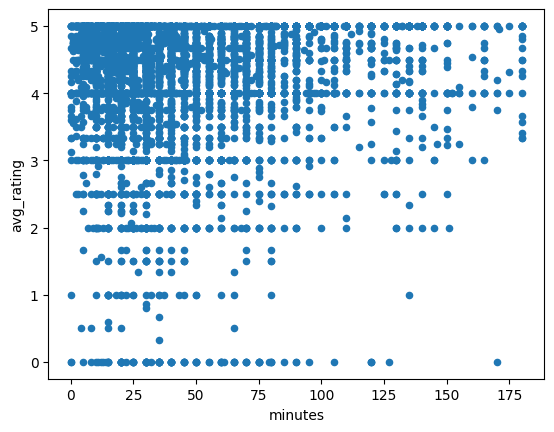

In [ ]:
data.plot.scatter(x="minutes", y="avg_rating")

In [ ]:
#num_calories, pdv_total_fat, pdv_sugar, pdv_sodium, pdv_protein, pdv_sat_fat, avg_rating, total_cost

### **Second insight: recipes with fewer calories, total fat, sugar, sodium, and saturated fat tend to have higher average ratings (note greatest density in top left regions of each plot)**

<Axes: xlabel='num_calories', ylabel='avg_rating'>

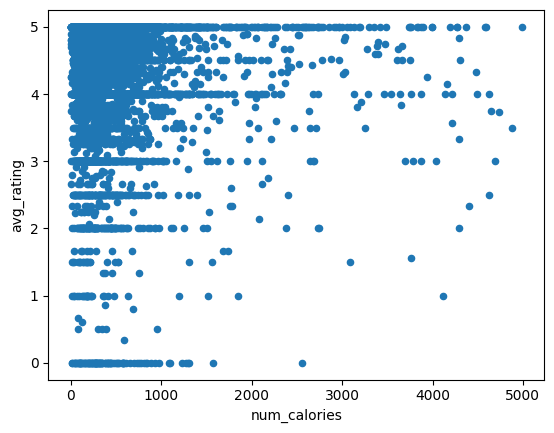

In [ ]:
data.plot.scatter(x="num_calories", y="avg_rating")

<Axes: xlabel='pdv_total_fat', ylabel='avg_rating'>

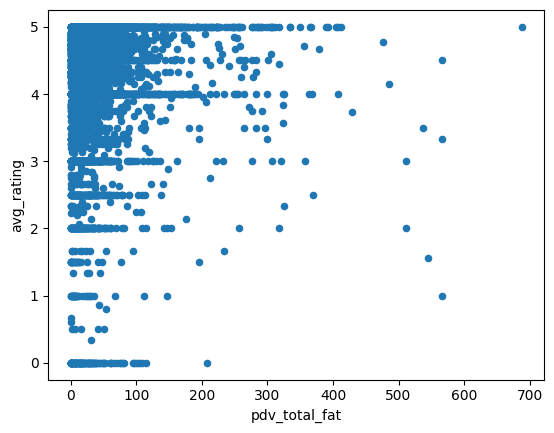

In [ ]:
data.plot.scatter(x="pdv_total_fat", y="avg_rating")

<Axes: xlabel='pdv_sat_fat', ylabel='avg_rating'>

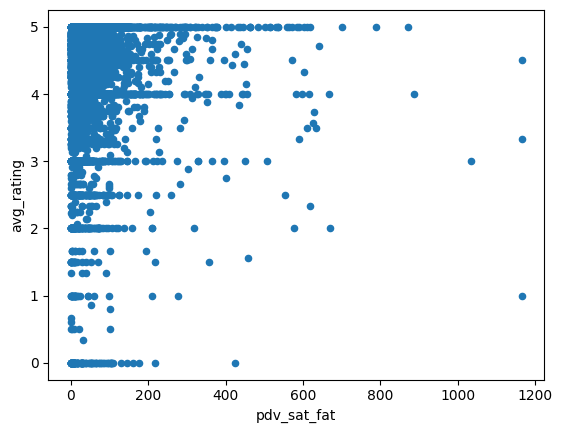

In [ ]:
data.plot.scatter(x="pdv_sat_fat", y="avg_rating")

<Axes: xlabel='pdv_sugar', ylabel='avg_rating'>

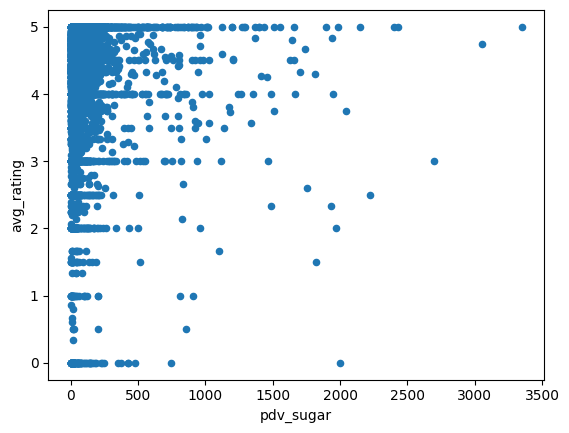

In [ ]:
data.plot.scatter(x="pdv_sugar", y="avg_rating")

<Axes: xlabel='pdv_sodium', ylabel='avg_rating'>

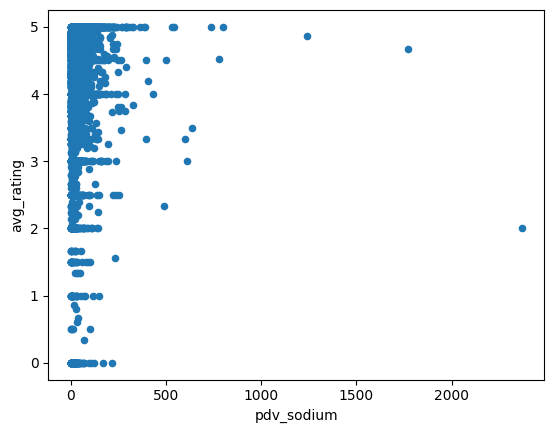

In [ ]:
data.plot.scatter(x="pdv_sodium", y="avg_rating")

### **Third insight: cheaper recipes tend to have higher average ratings (note greatest density in top left region)**

<Axes: xlabel='total_cost', ylabel='avg_rating'>

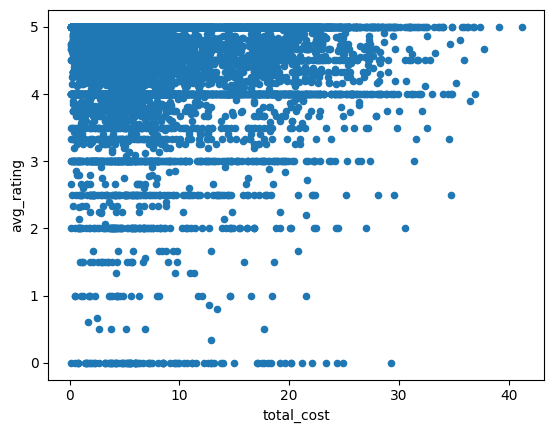

In [ ]:
data.plot.scatter(x="total_cost", y="avg_rating")

## **Finally, see the Excel sheet attached for some regression models that were run on the data. Also, see the PDF summary for a greater discussion of results and limitations of this study.**